In [1]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

In [6]:
file = files.upload()
img = cv2.imread("flower.jpg") 

Saving flower.jpg to flower (1).jpg


# resize() 이미지 크기 변경 함수

>resize(	src, dsize[, dst[, fx[, fy[, interpolation]]]]	) ->	dst

src = 입력할 이미지 변수

dst = 필터가 적용되어 저장될 이미지 변수 = 출력 이미지

size(cols,rows) = 변환시킬 이미지 크기(열, 행)

interpolation = 보간법

fx, fy = 상대 크기. 절대크기에 (0,0)을 할당한 다음, 상대크기의 값을 할당하여 사용. fx는 width, fy는 height의 배율 설정

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
이미지 확대시 새로 생긴 픽셀 주변의 픽셀들은 기존 이미지의 픽셀 정보들을 가짐

이 정보를 바탕으로 최대한 이질감이 없는 이미지 구현이 이뤄지도록 새로 생긴 픽셀 값을 채워야 함

이때 사용되는 것이 보간법.
이미 알려진 값들을 활용하여 원하는 위치에서 값을 추정하는 방법의 한 종류이다. 

여기서는 입력한 이미지에 처리할 알고리즘정도로 이해된다.

# interpolation 인자 종류

cv2.INTER_NEAREST 이웃 보간법	 
: 가장 가까운 픽셀의 픽셀값으로 할당. 시간이 가장 빠르나 성능 떨어짐

영상 확대 시 우둘투둘한 선이 생기는 aliasing 발생
>

cv2.INTER_LINEAR	쌍 선형 보간법	(default) 

: 주변의 4픽셀의 거리에 따른 가중치를 매김으로써 확대에 의한 화소 변질을 보완하는 방법
>

cv2.INTER_LINEAR_EXACT	비트 쌍 선형 보간법	 

cv2.INTER_CUBIC	바이큐빅 보간법	
: Linear 보간법의 확장으로 주변의 16픽셀로 부터 거리에 따른 가중치를 매김 
>

cv2.INTER_AREA	영역 보간법	
: 원본 이미지을 축소 시, 어느 부분의 픽셀을 뽑아올 것인지 선택해 주어야 하는데 영역의 특징을 추출해서 결과 지정해줌
  >

cv2.INTER_LANCZOS4	Lanczos 보간법
: 시간이 다소 오래걸림

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

일반적으로 INTER_LINEAR을 가장 많이 사용.

이미지 확대의 경우 INTER_LINEAR,INTER_CUBIC을 가장 많이 쓰고

이미지 축소의 경우, INTER_AREA를 많이 씀

NEAREST 이웃 보간법


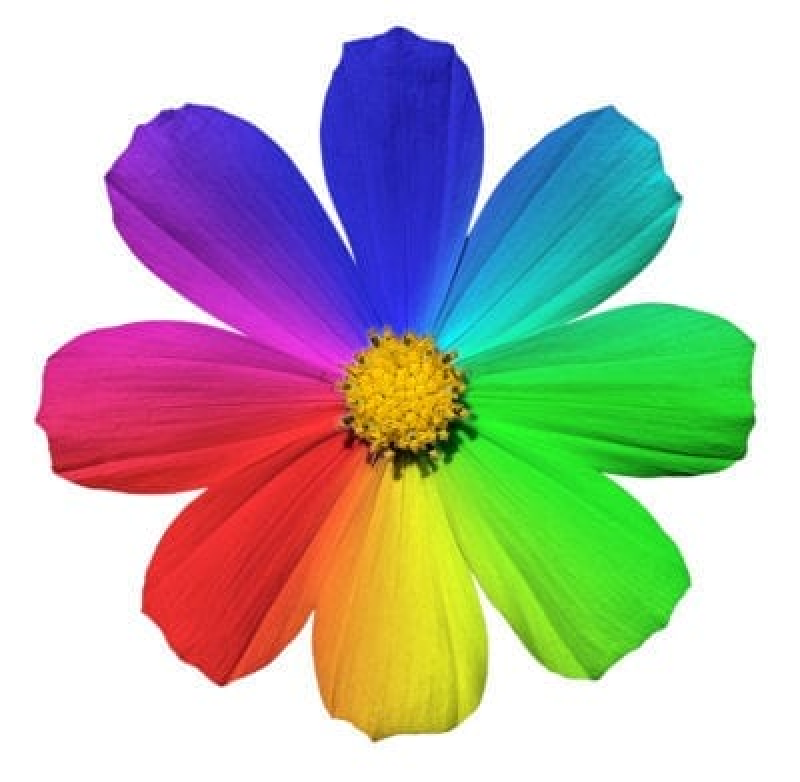

LINEAR 쌍 선형 보간법


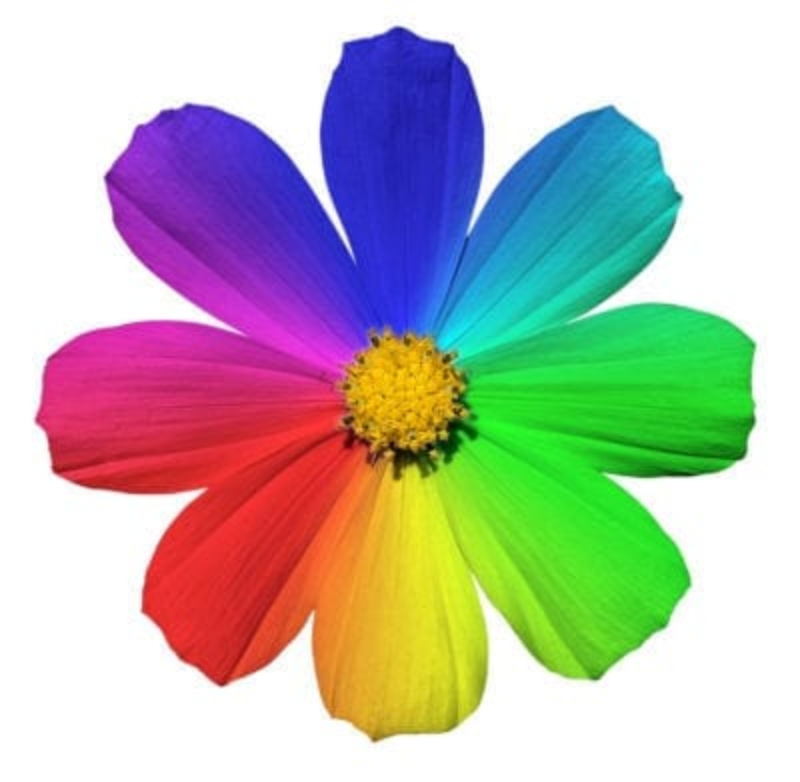

LINEAR_EXACT 비트 쌍 선형 보간법


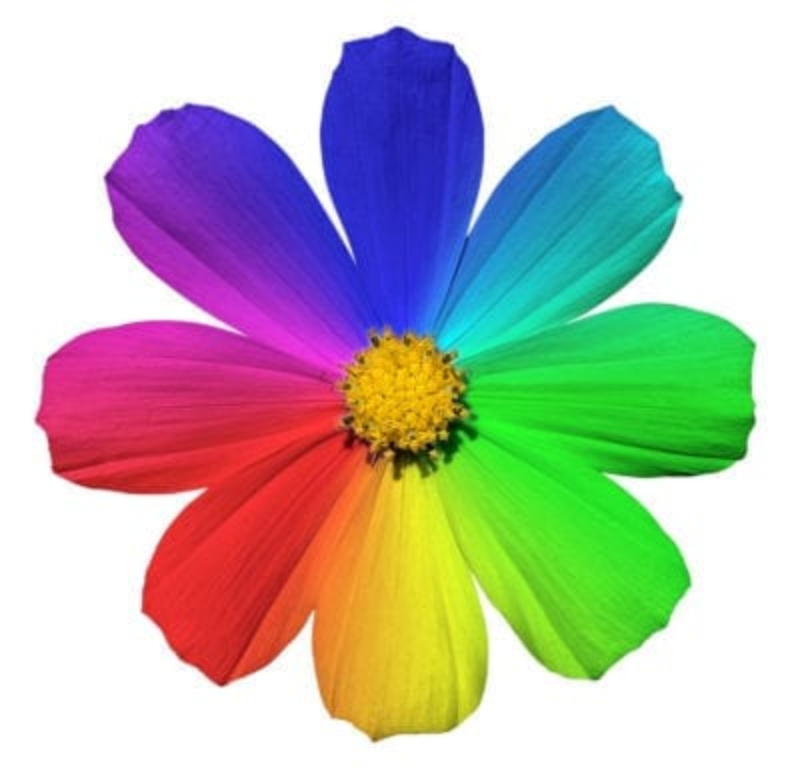

INTER_CUBIC 바이큐빅 보간법


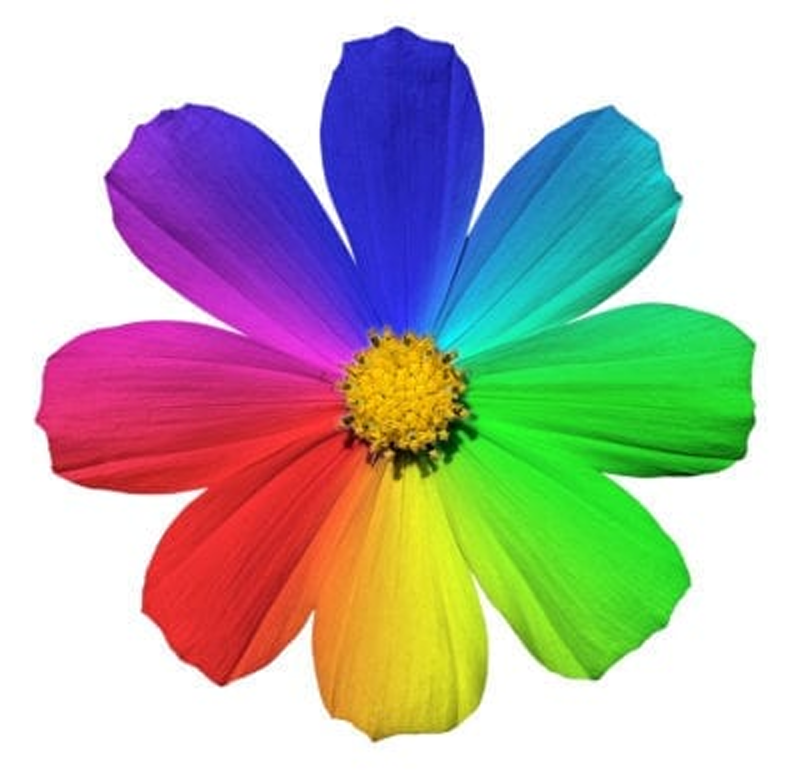

AREA 영역 보간법


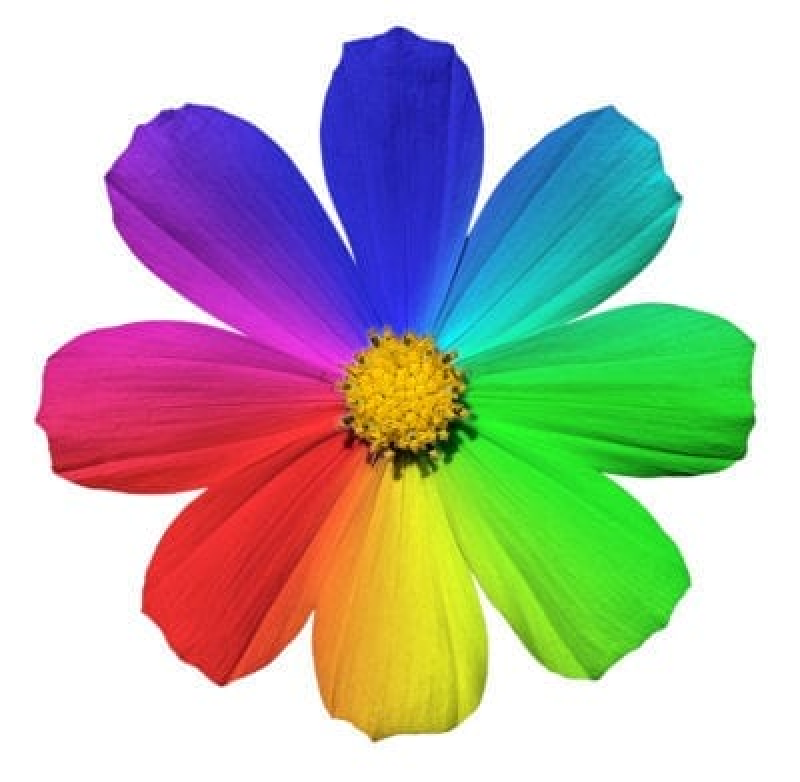

Lanczos 보간법


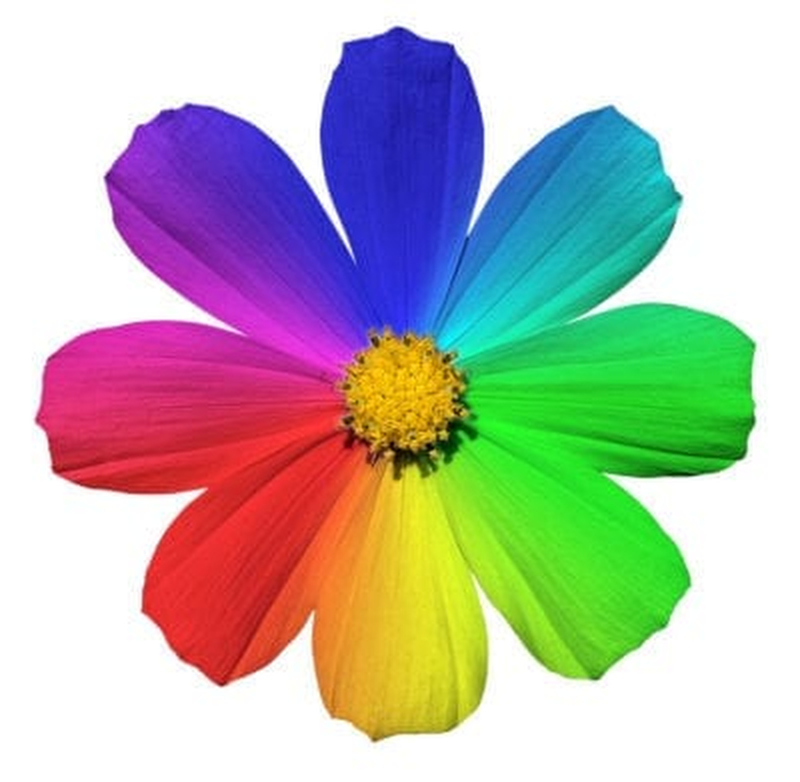

In [7]:
# 보간법에 따른 이미지 품질 확인을 위해 모두 확대 처리
src = img 
n_img = cv2.resize(src, dsize=(0, 0), fx=2, fy=2, interpolation=cv2.INTER_NEAREST)
l_img = cv2.resize(src, dsize=(0, 0), fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
le_img = cv2.resize(src, dsize=(0, 0), fx=2, fy=2, interpolation=cv2.INTER_LINEAR_EXACT)
c_img = cv2.resize(src, dsize=(0, 0), fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
a_img = cv2.resize(src, dsize=(0, 0), fx=2, fy=2, interpolation=cv2.INTER_AREA)
l4_img = cv2.resize(src, dsize=(0, 0), fx=2, fy=2, interpolation=cv2.INTER_LANCZOS4)
print('NEAREST 이웃 보간법')
cv2_imshow(n_img)
print('LINEAR 쌍 선형 보간법')
cv2_imshow(l_img)
print('LINEAR_EXACT 비트 쌍 선형 보간법')
cv2_imshow(le_img)
print('INTER_CUBIC 바이큐빅 보간법')
cv2_imshow(c_img)
print('AREA 영역 보간법')
cv2_imshow(a_img)
print('Lanczos 보간법')
cv2_imshow(l4_img)

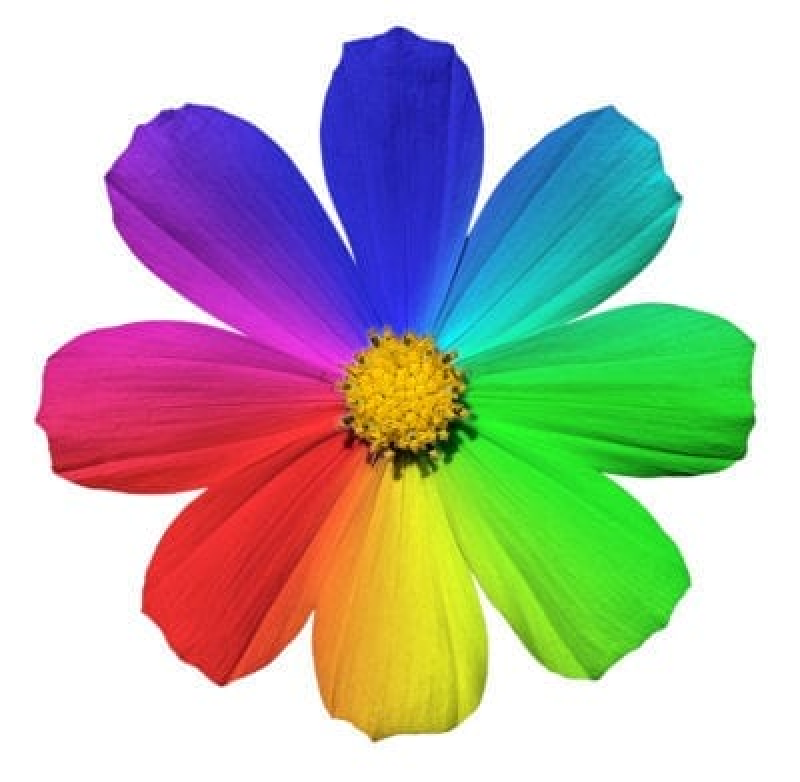

In [14]:
# 이웃 보간법
height, width, channel = img.shape

copy_img = np.zeros(shape=(int(height*2), int(width*2), channel), dtype=np.uint8)
c_height, c_width, c_channel = copy_img.shape

for y in range(height):
    r1_copy_img = copy_img[y*2]
    r2_copy_img = copy_img[y*2+1]

    org_img = img[y]

    for x in range(width):
        b = org_img[x][0]
        g = org_img[x][1]
        r = org_img[x][2]

        r1_copy_img[x*2][:] = b,g,r
        r1_copy_img[x*2+1][:] = b,g,r
        r2_copy_img[x*2][:] = b,g,r
        r2_copy_img[x*2+1][:] = b,g,r

cv2_imshow(copy_img)